# Explicit 5D Benchmarks

This file demonstrates how to generate, plot, and output data for 1d benchmarks

Choose from:


1. Korns_01
1. Korns_02
1. Korns_03
1. Korns_04
1. Korns_05
1. Korns_06
1. Korns_07
1. Korns_08
1. Korns_09
1. Korns_10
1. Korns_11
1. Korns_12
1. Korns_13
1. Korns_14
1. Korns_15



### Imports

In [1]:
from pypge.benchmarks import explicit

import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec

# plot the visuals in ipython
%matplotlib inline


### Generate the data with noise

In [3]:
# Set your output directories
img_dir = "../img/benchmarks/explicit/"
data_dir = "../data/benchmarks/explicit/"

# used for plotting
manual_scale = True
ymin = -2000
ymax = 2000
do_enable = False

xs_params = [ 
			(-3.14,3.14),
			(-3.14,3.14),
			(0.001,1000),
			(-3.14,3.14),
			(-3.14,3.14)
]
# choose your problem here
prob = explicit.Korns_15(noise=1.0, npts=4000, xs_params=xs_params)

# you can also specify the following params as keyword arguments
#
# params = {
#     'name': "Koza_01",
#     'xs_str': ["x"],
#     'eqn_str': "x**4 + x**3 + x**2 + x",
#     'xs_params': [ (-4.0,4.0) ],
#     'npts': 200,
#     'noise': 1.0
# }

# or make your own with the following
#
# explicit.Explicit_1D(params):


{   'eqn_str': '12 - 6*(tan(x)/exp(y))*(ln(z)-tan(v))',
    'name': 'Korns_15',
    'noise': 1.0,
    'npts': 4000,
    'xs': [x, y, z, v, w],
    'xs_params': [   (-3.14, 3.14),
                     (-3.14, 3.14),
                     (0.001, 1000),
                     (-3.14, 3.14),
                     (-3.14, 3.14)],
    'xs_str': ['x', 'y', 'z', 'v', 'w']}


### Plot inline and save image

Korns_15 -6*(log(z) - tan(v))*exp(-y)*tan(x) + 12
(5, 4000)


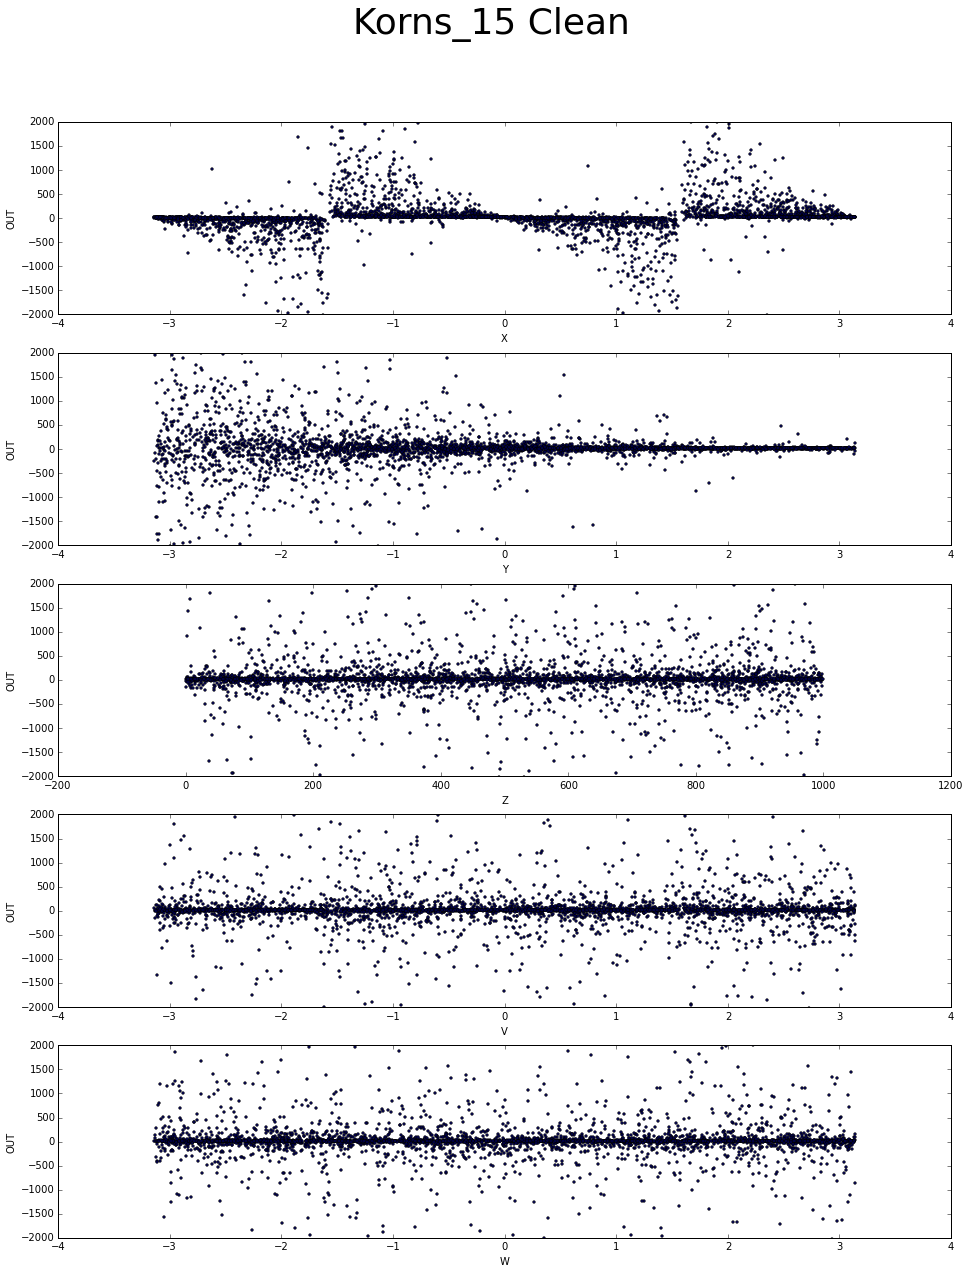

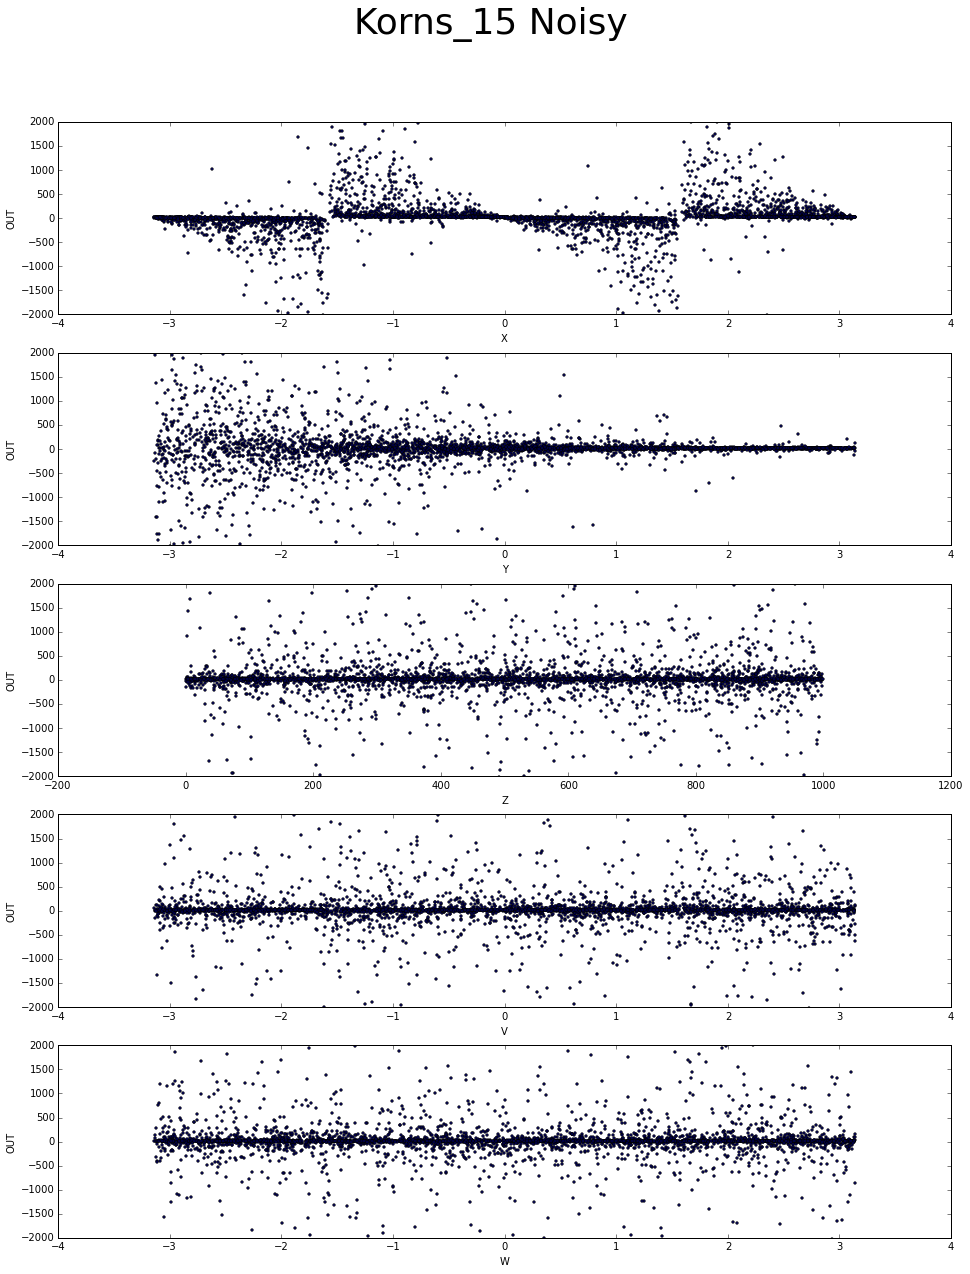

In [4]:
print prob['name'], prob['eqn']
print prob['xpts'].shape

xs = prob['xpts'][0]
ys = prob['xpts'][1]
zs = prob['xpts'][2]
vs = prob['xpts'][3]
ws = prob['xpts'][4]

Ys = prob['ypure']

fig = plt.figure()
fig.set_size_inches(16, 20)
gs = gridspec.GridSpec(5, 2)
fig.suptitle(prob['name'] + " Clean", fontsize=36)

ax0 = fig.add_subplot(gs[0,:])
ax0.scatter(xs, Ys, marker='.')
ax0.set_xlabel('X')
ax0.set_ylabel('OUT')
if manual_scale:
    plt.autoscale(enable=do_enable)
    plt.ylim(ymin,ymax)

ax1 = fig.add_subplot(gs[1,:])
ax1.scatter(ys, Ys, marker='.')
ax1.set_xlabel('Y')
ax1.set_ylabel('OUT')
if manual_scale:
    plt.autoscale(enable=do_enable)
    plt.ylim(ymin,ymax)

ax2 = fig.add_subplot(gs[2,:])
ax2.scatter(zs, Ys, marker='.')
ax2.set_xlabel('Z')
ax2.set_ylabel('OUT')
if manual_scale:
    plt.autoscale(enable=do_enable)
    plt.ylim(ymin,ymax)

ax3 = fig.add_subplot(gs[3,:])
ax3.scatter(vs, Ys, marker='.')
ax3.set_xlabel('V')
ax3.set_ylabel('OUT')
if manual_scale:
    plt.autoscale(enable=do_enable)
    plt.ylim(ymin,ymax)

ax4 = fig.add_subplot(gs[4,:])
ax4.scatter(ws, Ys, marker='.')
ax4.set_xlabel('W')
ax4.set_ylabel('OUT')
if manual_scale:
    plt.autoscale(enable=do_enable)
    plt.ylim(ymin,ymax)

plt.savefig(img_dir + prob['name'].lower() + "_clean.png", dpi=200)
plt.show()



Ys = prob['ypts']
fig = plt.figure()
fig.set_size_inches(16, 20)
gs = gridspec.GridSpec(5, 2)
fig.suptitle(prob['name'] + " Noisy", fontsize=36)

ax0 = fig.add_subplot(gs[0,:])
ax0.scatter(xs, Ys, marker='.')
ax0.set_xlabel('X')
ax0.set_ylabel('OUT')
if manual_scale:
    plt.autoscale(enable=do_enable)
    plt.ylim(ymin,ymax)

ax1 = fig.add_subplot(gs[1,:])
ax1.scatter(ys, Ys, marker='.')
ax1.set_xlabel('Y')
ax1.set_ylabel('OUT')
if manual_scale:
    plt.autoscale(enable=do_enable)
    plt.ylim(ymin,ymax)

ax2 = fig.add_subplot(gs[2,:])
ax2.scatter(zs, Ys, marker='.')
ax2.set_xlabel('Z')
ax2.set_ylabel('OUT')
if manual_scale:
    plt.autoscale(enable=do_enable)
    plt.ylim(ymin,ymax)

ax3 = fig.add_subplot(gs[3,:])
ax3.scatter(vs, Ys, marker='.')
ax3.set_xlabel('V')
ax3.set_ylabel('OUT')
if manual_scale:
    plt.autoscale(enable=do_enable)
    plt.ylim(ymin,ymax)

ax4 = fig.add_subplot(gs[4,:])
ax4.scatter(ws, Ys, marker='.')
ax4.set_xlabel('W')
ax4.set_ylabel('OUT')
if manual_scale:
    plt.autoscale(enable=do_enable)
    plt.ylim(ymin,ymax)

plt.savefig(img_dir + prob['name'].lower() + "_noisy.png", dpi=200)
plt.show()



### Output json and csv data

In [5]:
data = np.array([prob['xpts'][0],prob['xpts'][1],prob['xpts'][2],prob['xpts'][3],prob['xpts'][4], prob['ypts']]).T
print data.shape

cols = [['x', 'y', 'z', 'v', 'w', 'out']]
out_data = cols + data.tolist()
import json
json_out = json.dumps( out_data, indent=4)
# print json_out

f_json = open(data_dir + prob['name'].lower() + ".json", 'w')
f_json.write(json_out)
f_json.close()

f_csv = open(data_dir + prob['name'].lower() + ".csv", 'w')
for row in out_data:
    line = ", ".join([str(col) for col in row]) + "\n"
    f_csv.write(line)
f_csv.close()

(4000, 6)


### Output *clean* json and csv data

In [6]:
data = np.array([prob['xpts'][0],prob['xpts'][1],prob['xpts'][2],prob['xpts'][3],prob['xpts'][4], prob['ypure']]).T
print data.shape

cols = [['x', 'y', 'z', 'v', 'w', 'out']]
out_data = cols + data.tolist()
import json
json_out = json.dumps( out_data, indent=4)
# print json_out

f_json = open(data_dir + prob['name'].lower() + "_clean.json", 'w')
f_json.write(json_out)
f_json.close()

f_csv = open(data_dir + prob['name'].lower() + "_clean.csv", 'w')
for row in out_data:
    line = ", ".join([str(col) for col in row]) + "\n"
    f_csv.write(line)
f_csv.close()

(4000, 6)
